In [8]:
# 1. Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portofolio Data/IMBD Review/IMDB Dataset.csv')
df.head()
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB



Distribusi Sentimen:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


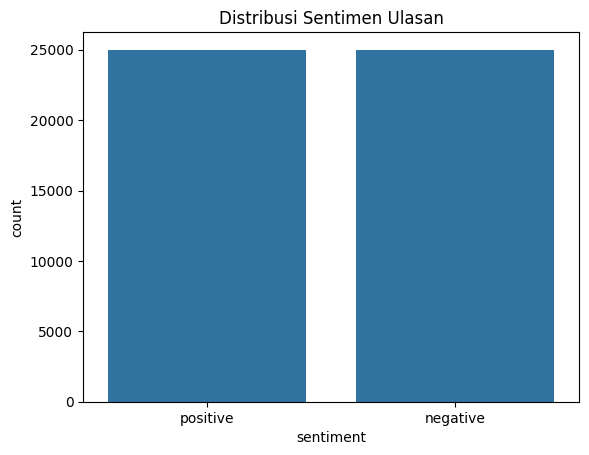

In [10]:
# 3. Cek Distribusi Sentimen
print("\nDistribusi Sentimen:")
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title('Distribusi Sentimen Ulasan')
plt.show()

In [11]:
# 4. Lihat contoh ulasan positif dan negatif
print("\nContoh Ulasan Positif:")
print(df[df['sentiment'] == 'positive']['review'].iloc[0])

print("\nContoh Ulasan Negatif:")
print(df[df['sentiment'] == 'negative']['review'].iloc[0])


Contoh Ulasan Positif:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of th

In [12]:
import re
import nltk
from nltk.corpus import stopwords

# 5. Download daftar stopwords dari NLTK
nltk.download('stopwords')

# 6. Fungsi untuk membersihkan teks
def preprocess_text(text):
    # 1. Hapus HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 2. Hapus karakter non-alfabet (tanda baca, angka)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Ubah ke huruf kecil
    text = text.lower()

    # 4. Tokenisasi dan hapus stopwords
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# 7. Terapkan fungsi pembersihan ke kolom 'review'
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("\nContoh Ulasan Setelah Dibersihkan:")
print(df['cleaned_review'].iloc[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Contoh Ulasan Setelah Dibersihkan:
one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill ord

In [13]:
# 8. Mengubah Teks menjadi Angka (Feature Engineering)
from sklearn.feature_extraction.text import CountVectorizer

# 9. Inisialisasi CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Inisialisasi TF-IDF Vectorizer
# max_features membatasi jumlah kata yang paling sering muncul untuk dipertimbangkan

# 10. Ubah teks menjadi vektor numerik
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0) # Ubah sentimen menjadi 1 (positif) dan 0 (negatif)
print("\nDimensi matriks fitur (X):", X.shape)
print("Dimensi target (y):", y.shape)


Dimensi matriks fitur (X): (50000, 5000)
Dimensi target (y): (50000,)


In [14]:
# 11. Membangun & Melatih Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

print("\nModel berhasil dilatih!")


Model berhasil dilatih!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# 12. Evaluasi Kinerja Model
from sklearn.metrics import accuracy_score, classification_report

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Akurasi Model: 87.38%

Laporan Klasifikasi:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87      4961
    Positive       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [24]:
# 13. Uji Coba dengan Ulasan Baru

# Ulasan baru untuk diuji
new_review_1 = "This movie was fantastic! The acting was superb and the plot was engaging."
new_review_2 = "A complete waste of time. The movie was boring and predictable."

# 14. Buat fungsi untuk prediksi
def predict_sentiment(review_text):
    # 1. Bersihkan teks
    cleaned_text = preprocess_text(review_text)
    # 2. Ubah ke vektor
    vectorized_text = vectorizer.transform([cleaned_text]).toarray()
    # 3. Prediksi
    prediction = model.predict(vectorized_text)

    return "Positif" if prediction[0] == 1 else "Negatif"

# Lakukan prediksi
print(f"\nUlasan: '{new_review_1}'")
print(f"Prediksi Sentimen: {predict_sentiment(new_review_1)}")

print(f"\nUlasan: '{new_review_2}'")
print(f"Prediksi Sentimen: {predict_sentiment(new_review_2)}")


Ulasan: 'This movie was fantastic! The acting was superb and the plot was engaging.'
Prediksi Sentimen: Positif

Ulasan: 'A complete waste of time. The movie was boring and predictable.'
Prediksi Sentimen: Negatif


In [25]:
#15. Buat Antarmuka (UI) Sederhana

# Install gradio
!pip install gradio

import gradio as gr

# Ambil fungsi predict_sentiment yang sudah Anda buat sebelumnya
def predict_sentiment(review_text):
    # (kode fungsi Anda yang sudah ada di sini)
    cleaned_text = preprocess_text(review_text)
    vectorized_text = vectorizer.transform([cleaned_text]).toarray()
    prediction = model.predict(vectorized_text)
    return "Positif" if prediction[0] == 1 else "Negatif"

# Buat antarmuka
iface = gr.Interface(fn=predict_sentiment,
                     inputs=gr.Textbox(lines=5, placeholder="Ketik ulasan film dalam Bahasa Inggris di sini..."),
                     outputs="text",
                     title="Analisis Sentimen Ulasan Film",
                     description="Model ini memprediksi apakah sebuah ulasan film bersifat positif atau negatif.")

# Luncurkan antarmuka
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a35e4a97b404dad7e1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
